<a href="https://colab.research.google.com/github/ykevinsh/machine-learnig-/blob/main/proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style = "whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("glass.csv")

In [ ]:
print(df.tail())
print(df.shape)   

          RI     Na   Mg    Al     Si     K    Ca    Ba   Fe  Type
209  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0     6
210  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0     6
211  1.52065  14.36  0.0  2.02  73.42  0.00  8.44  1.64  0.0     6
212  1.51651  14.38  0.0  1.94  73.61  0.00  8.48  1.57  0.0     6
213  1.51711  14.23  0.0  2.08  73.36  0.00  8.62  1.67  0.0     6
(214, 10)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [ ]:
print(df.isnull().any())

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool


In [ ]:
X = df.drop("Type", axis = 1)
print(X.shape)
print(X.describe().T.round(2))

(214, 9)
    count   mean   std    min    25%    50%    75%    max
RI  214.0   1.52  0.00   1.51   1.52   1.52   1.52   1.53
Na  214.0  13.41  0.82  10.73  12.91  13.30  13.82  17.38
Mg  214.0   2.68  1.44   0.00   2.11   3.48   3.60   4.49
Al  214.0   1.44  0.50   0.29   1.19   1.36   1.63   3.50
Si  214.0  72.65  0.77  69.81  72.28  72.79  73.09  75.41
K   214.0   0.50  0.65   0.00   0.12   0.56   0.61   6.21
Ca  214.0   8.96  1.42   5.43   8.24   8.60   9.17  16.19
Ba  214.0   0.18  0.50   0.00   0.00   0.00   0.00   3.15
Fe  214.0   0.06  0.10   0.00   0.00   0.00   0.10   0.51


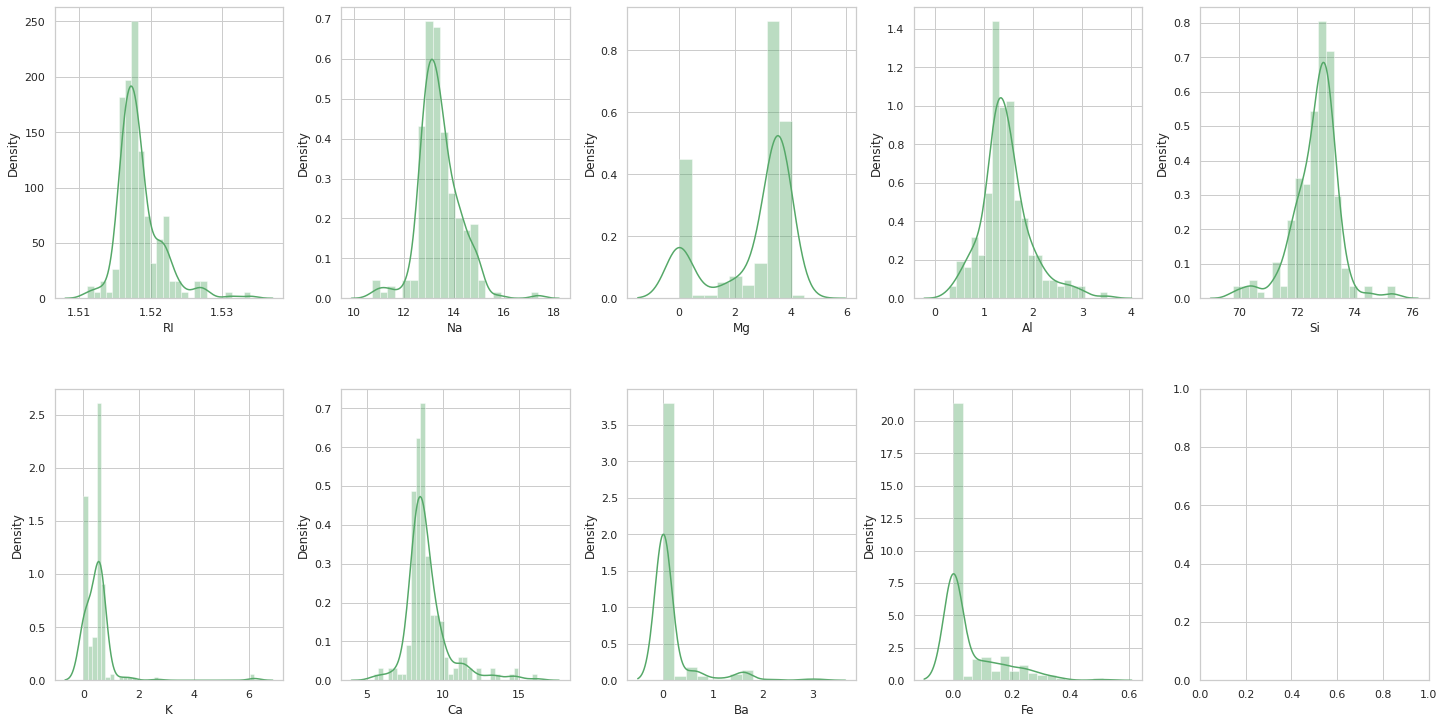

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in X.items():
    sns.distplot(value, color='g', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

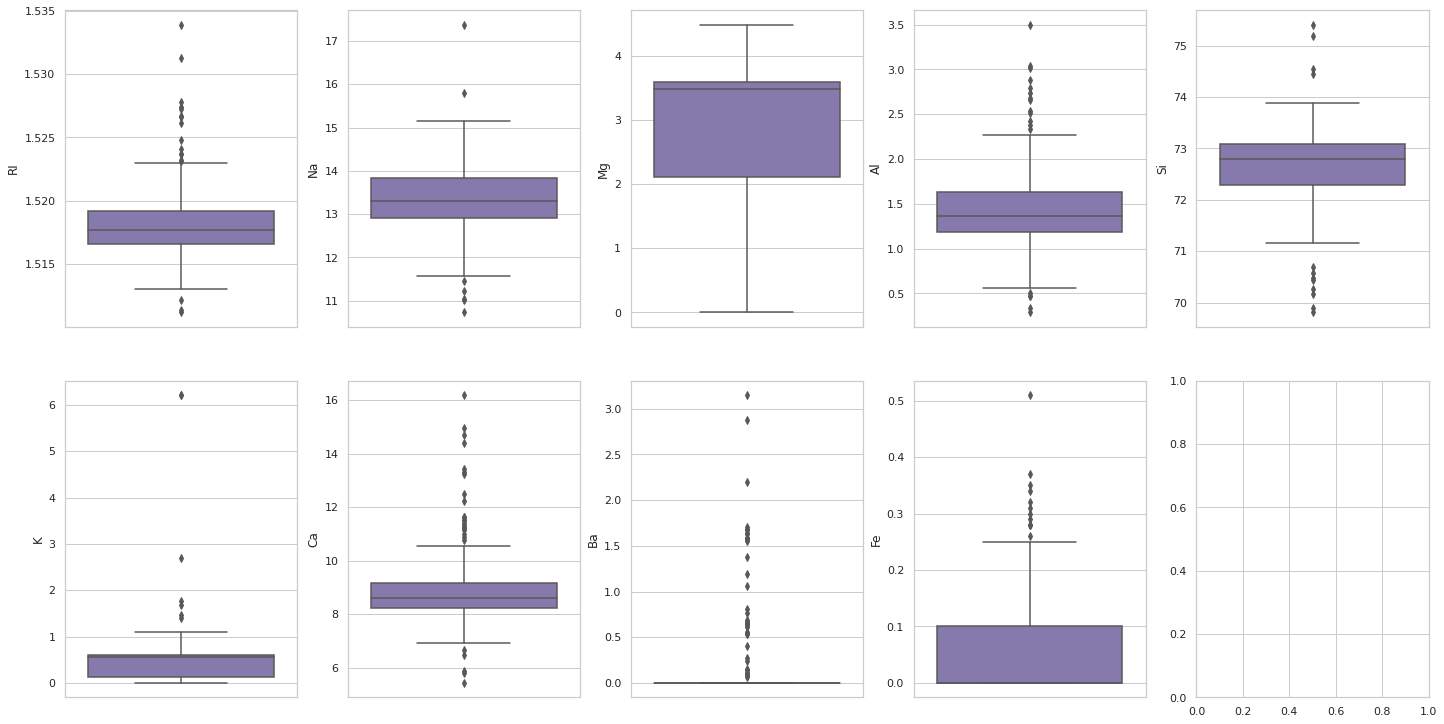

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in X.items():
    sns.boxplot(y=col, data=X, color='m', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
X = df.drop(["Type","Ba"], axis = 1)
print(X.shape)
print(X.describe().T.round(2))

(214, 8)
    count   mean   std    min    25%    50%    75%    max
RI  214.0   1.52  0.00   1.51   1.52   1.52   1.52   1.53
Na  214.0  13.41  0.82  10.73  12.91  13.30  13.82  17.38
Mg  214.0   2.68  1.44   0.00   2.11   3.48   3.60   4.49
Al  214.0   1.44  0.50   0.29   1.19   1.36   1.63   3.50
Si  214.0  72.65  0.77  69.81  72.28  72.79  73.09  75.41
K   214.0   0.50  0.65   0.00   0.12   0.56   0.61   6.21
Ca  214.0   8.96  1.42   5.43   8.24   8.60   9.17  16.19
Fe  214.0   0.06  0.10   0.00   0.00   0.00   0.10   0.51


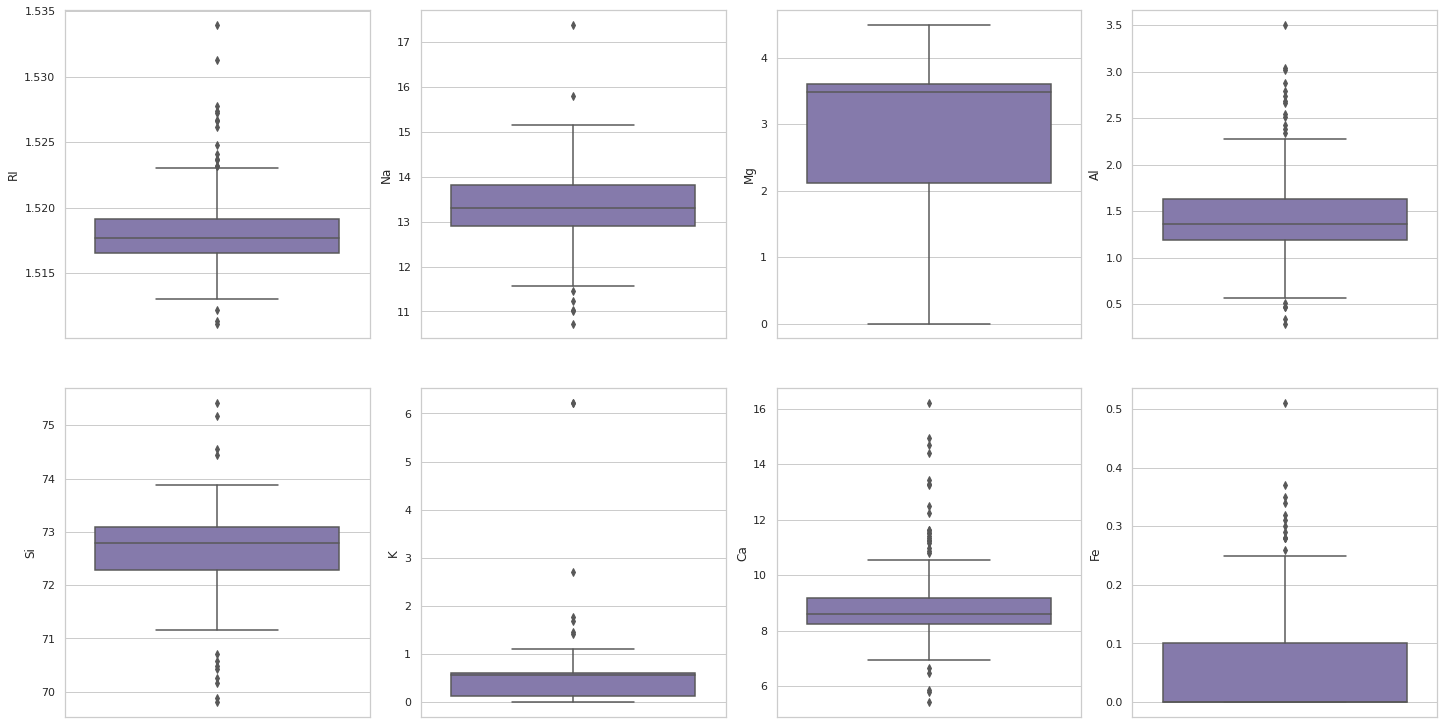

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in X.items():
    sns.boxplot(y=col, data=X, color='m', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

(214,)
   y_variable  percentage_count
5           5          0.042056
4           4          0.060748
3           3          0.079439
2           6          0.135514
1           1          0.327103
0           2          0.355140


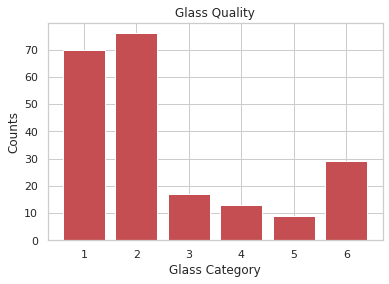

In [ ]:
y = df["Type"]
print(y.shape)
print(y.value_counts(normalize = True).reset_index().rename(columns = {'index': 'y_variable', 'Type': 'percentage_count'}).sort_values(by = "percentage_count"))

labels, counts = np.unique(y, return_counts=True)
plt.bar(labels, counts, align='center', color = "r")
plt.title("Glass Quality")
plt.xlabel("Glass Category")
plt.ylabel("Counts")
plt.xticks(labels)
plt.show()

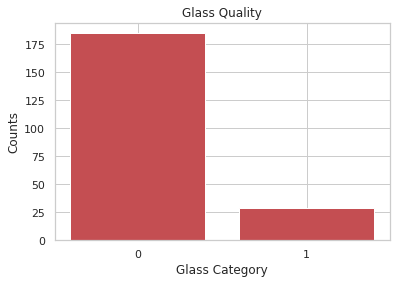

In [ ]:
y_binary = np.where(y >= 6, 1, 0) # Esta será nuestra nueva variable objetivo.
# Ahora pasamos de un problema de clasificación múltiple a un problema de clasificación binario.

labels, counts = np.unique(y_binary, return_counts=True)
plt.bar(labels, counts, align='center', color = "r")
plt.title("Glass Quality")
plt.xlabel("Glass Category")
plt.ylabel("Counts")
plt.xticks(labels)
plt.show()

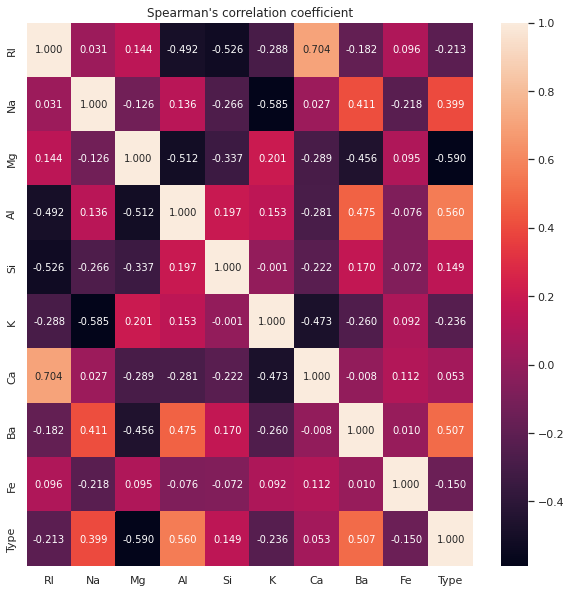

In [ ]:
corr_spearman = df.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_spearman, annot = True, fmt=".3f").set_title(
    "Spearman's correlation coefficient")
plt.show()

Métodos de clasificacion

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [ ]:
ss = PowerTransformer()
X_scaled = ss.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled)
print(df_scaled.describe().T.round(2))

   count  mean  std   min   25%   50%   75%   max
0  214.0   0.0  0.0  0.00  0.00  0.00  0.00  0.00
1  214.0  -0.0  1.0 -3.69 -0.60 -0.10  0.54  4.26
2  214.0   0.0  1.0 -1.74 -0.78  0.53  0.67  1.88
3  214.0   0.0  1.0 -3.10 -0.45 -0.08  0.47  3.16
4  214.0  -0.0  1.0 -3.09 -0.54  0.13  0.54  4.50
5  214.0  -0.0  1.0 -1.62 -0.98  0.47  0.59  3.45
6  214.0   0.0  1.0 -4.62 -0.47 -0.14  0.33  3.25
7  214.0   0.0  1.0 -0.68 -0.68 -0.68  1.19  1.80


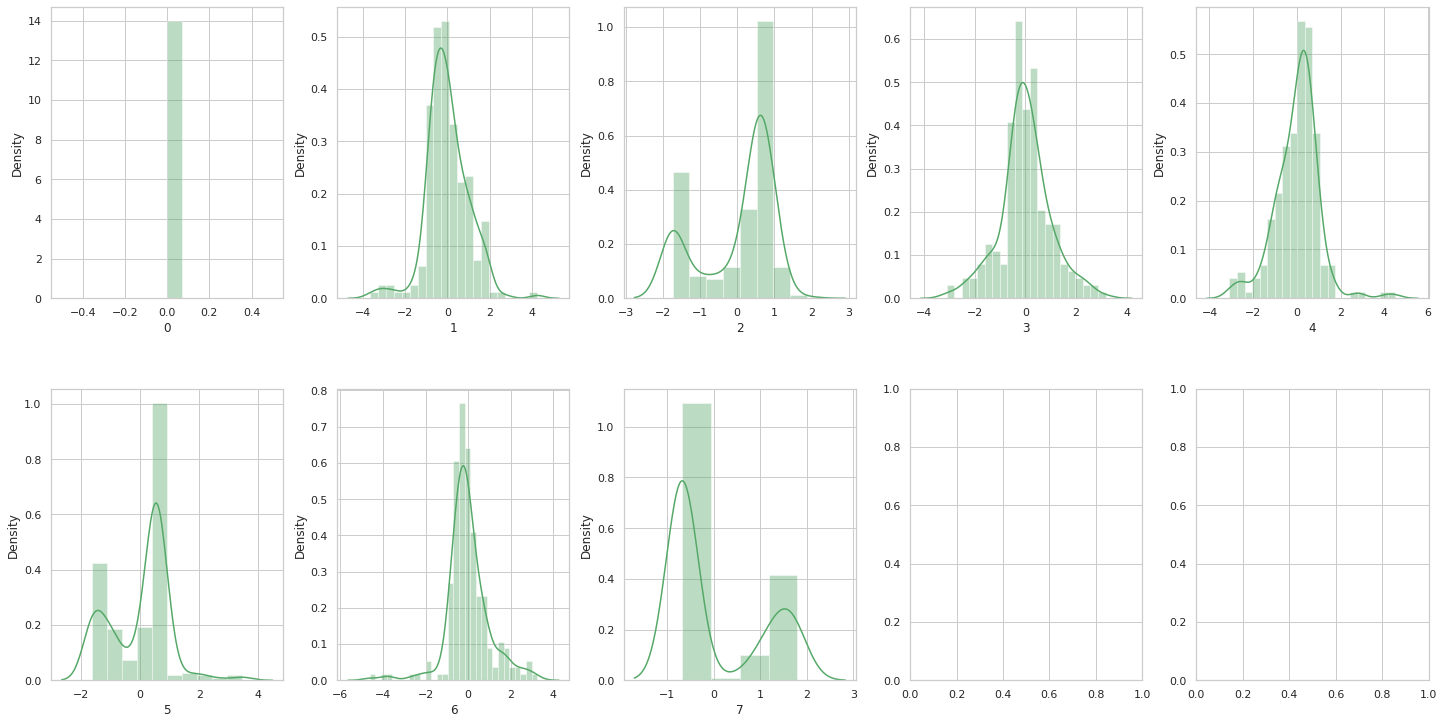

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df_scaled.items():
    sns.distplot(value, color='g', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size = 0.25, random_state = 22)

print("X_train shape: "+str(X_train.shape[0]), "y_train shape: "+str(y_train.shape[0]), sep = "\n")
print("X_test shape:"+str(X_test.shape[0]), "y_test shape:"+str(y_test.shape[0]), sep = "\n")

X_train shape: 160
y_train shape: 160
X_test shape:54
y_test shape:54


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier() #Genera el modelo
KNN.fit(X_train, y_train)   #Entrena el modelo
y_pred_knn = KNN.predict(X_test)   #Genera la predicción

print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(KNN.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(KNN.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.99
Precisión del modelo en el subconjunto de prueba: 0.94


In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train) #Entrena el modelo
y_pred_nb = NaiveBayes.predict(X_test) #Genera la predicción
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(NaiveBayes.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(NaiveBayes.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.97
Precisión del modelo en el subconjunto de prueba: 0.94


In [ ]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train) #Entrena el modelo
y_pred_lr = LogisticRegression.predict(X_test) #Genera la predicción
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(LogisticRegression.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(LogisticRegression.score(X_test, y_test).round(2)))


Precisión del modelo en el subconjunto de entrenamiento: 0.97
Precisión del modelo en el subconjunto de prueba: 0.91


In [ ]:
from sklearn.svm import SVC

SVC = SVC()
SVC.fit(X_train, y_train) #Entrena el modelo
y_pred_svc = SVC.predict(X_test) #Genera la predición

print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(SVC.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(SVC.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 1.0
Precisión del modelo en el subconjunto de prueba: 0.93


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train) #Entrena el modelo
y_pred_rfc = RFC.predict(X_test) #Genera la predicción

print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(RFC.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(RFC.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 1.0
Precisión del modelo en el subconjunto de prueba: 0.91


In [ ]:
from sklearn.neural_network import MLPClassifier

ANN = MLPClassifier()
ANN.fit(X_train, y_train)
y_pred_ann = ANN.predict(X_test)

print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(ANN.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(ANN.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.99
Precisión del modelo en el subconjunto de prueba: 0.91
